In [1]:
!pip install boto3 pillow matplotlib --quiet

In [2]:
import boto3

s3 = boto3.client('s3')

bucket_name = 'smile-detection-lab-devanshi'  # Change this
object_key = 'webcam_20260224_160110.jpg'  # Use the correct key

# Download the image into your notebook
s3.download_file(bucket_name, object_key, 'webcam_20260224_160110.jpg') # Use the correct key

print("Image downloaded from S3")


Image downloaded from S3


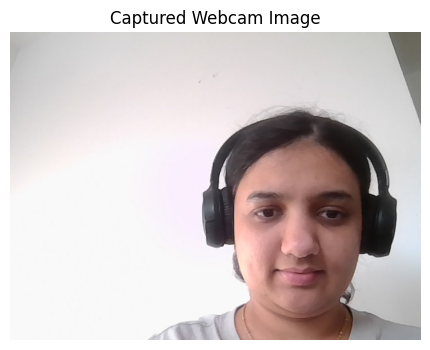

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('webcam_20260224_160110.jpg')  # Dynamically uses variable

plt.figure(figsize=(6, 4))
plt.imshow(img)
plt.axis('off')  # Hide axis lines
plt.title("Captured Webcam Image")
plt.show()


In [6]:
import boto3

# Initialize Rekognition client
rekognition = boto3.client("rekognition")

local_image = "webcam_20260224_160110.jpg"

# Read image bytes from local file
with open(local_image, "rb") as image_file:
    image_bytes = image_file.read()

# Detect faces and emotions
response = rekognition.detect_faces(Image={"Bytes": image_bytes}, Attributes=["ALL"])

# Loop and print smile + emotions
for i, faceDetail in enumerate(response["FaceDetails"], start=1):
    smile = faceDetail["Smile"]
    print(f"Face {i}:")
    print(f"  Smile: {smile['Value']} (Confidence: {smile['Confidence']:.2f}%)")
    print("  Emotions:")
    for emotion in faceDetail["Emotions"]:
        print(f"    {emotion['Type']}: {emotion['Confidence']:.2f}%")
    print("-" * 30)



Face 1:
  Smile: False (Confidence: 95.16%)
  Emotions:
    CALM: 98.47%
    CONFUSED: 0.37%
    DISGUSTED: 0.22%
    SAD: 0.12%
    HAPPY: 0.10%
    SURPRISED: 0.02%
    ANGRY: 0.01%
    FEAR: 0.00%
------------------------------


Face 1 Smile info: Not Smiling (95.2%)


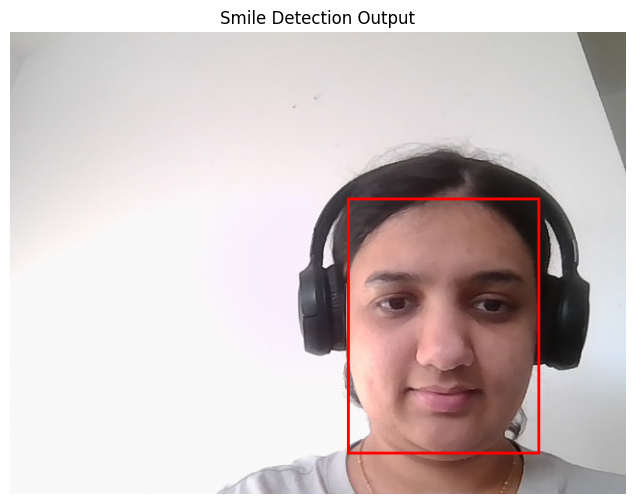

In [9]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import boto3

# Local image file
local_image = 'webcam_20260224_160110.jpg'

# Load image
image = Image.open(local_image)
img_width, img_height = image.size

# Rekognition client
rekognition = boto3.client('rekognition')

# Detect faces
with open(local_image, 'rb') as img_file:
    response = rekognition.detect_faces(
        Image={'Bytes': img_file.read()},
        Attributes=['ALL']
    )

# Draw bounding boxes
draw = ImageDraw.Draw(image)

for i, face in enumerate(response['FaceDetails'], start=1):
    smile = face['Smile']
    print(
        f"Face {i} Smile info: "
        f"{'Smiling' if smile['Value'] else 'Not Smiling'} "
        f"({smile['Confidence']:.1f}%)"
    )

    # Bounding box calculation
    box = face['BoundingBox']
    left = img_width * box['Left']
    top = img_height * box['Top']
    width = img_width * box['Width']
    height = img_height * box['Height']

    draw.rectangle(
        [left, top, left + width, top + height],
        outline='red',
        width=3
    )

plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')
plt.title("Smile Detection Output")
plt.show()

